<a href="https://colab.research.google.com/github/roymuli/Python-Projects/blob/main/SALES_%26_PROFITABILITY_ANALYTICS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Introduction**



## a. Dataset Summary

- This dataset contains sales transaction records from a superstore, including order details, customer demographics, product categories, and financial metrics. It tracks purchases with attributes like Order ID, Customer ID, Product ID, Sales, Quantity, Discount, and Profit, along with shipping and regional details.

- The dataset is useful for sales analysis, customer segmentation, demand forecasting, and profitability optimization.

- Potential insights include best-selling products, regional sales trends, and the impact of discounts on profit margins.

- It supports business intelligence, predictive modeling, and supply chain optimization.



## b. Problem Statement

The superstore generates vast amounts of sales transaction data across multiple regions, customer segments, and product categories. However, it lacks a structured approach to analyzing sales performance, identifying key revenue drivers, and optimizing profitability. Critical questions remain unanswered:

- Which products and categories generate the highest revenue and profit?


- How do discounts impact profitability?


- Which customer segments and regions contribute most to sales?

- Are there seasonal trends affecting sales performance?


**This study aims to analyze sales patterns, identify revenue-maximizing strategies, and provide data-driven recommendations to enhance business performance**. 🚀

In [18]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:,.2f}'.format

In [4]:
#load dataset
file_path ='/content/drive/MyDrive/Superstore.csv'

df = pd.read_csv(file_path)

In [5]:
#dataset overview
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08T00:00:00Z,2016-11-11T00:00:00Z,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91
1,2,CA-2016-152156,2016-11-08T00:00:00Z,2016-11-11T00:00:00Z,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58
2,3,CA-2016-138688,2016-06-12T00:00:00Z,2016-06-16T00:00:00Z,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87


In [6]:
# rows & columns
rows, columns = df.shape
print(f'Rows: {rows}\nColumns: {columns}')

Rows: 9994
Columns: 21


In [7]:
#columns
df.columns.to_list()

['Row ID',
 'Order ID',
 'Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'Country',
 'City',
 'State',
 'Postal Code',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales',
 'Quantity',
 'Discount',
 'Profit']

In [8]:
#check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

# **2.Data Cleaning and Preprocessing**

**Missing Values**

In [9]:
#check missing values
df.isna().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


**Duplicates**

In [25]:
df.duplicated().sum()

0

In [10]:
# my focus is sales
df['Sales'].describe()

,Sales
count,"9,994.00"
mean,229.86
std,623.25
min,0.44
25%,17.28
50%,54.49
75%,209.94
max,"22,638.48"


- The Sales data consists of 9,994 recorded transactions. The mean (average) sales value is 229.86, indicating that, on average, each transaction generates about 229.86 units in sales.

- However, the standard deviation (623.25) suggests high variability in sales figures, meaning individual transactions can significantly differ from the average.

- The minimum sales value recorded is 0.44, while the maximum sales value is 22,638.48, showing a wide range of transaction amounts.

- The median (50th percentile) sales value is 54.49, meaning that half of all sales transactions are below this amount, suggesting that the data is skewed by a few very high-value transactions.

- The quartile values provide further insights into data distribution:

- 25% of sales transactions are below 17.28 (1st quartile).
- 50% (median) are below 54.49.
- 75% are below 209.94, meaning only 25% of sales transactions exceed this value.

<Axes: >

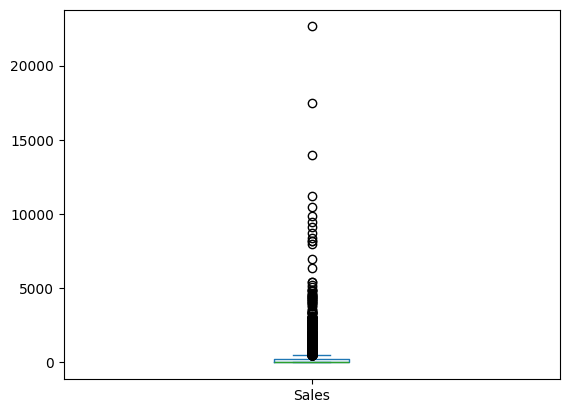

In [11]:
#check for outliers
df['Sales'].plot(kind='box')

- Seems there a several outliers

In [12]:
#identify outliers for the numerical values
numerics = df.select_dtypes(include=['float64', 'int64']).columns

#calculate IQR
Q1 = df[numerics].quantile(0.25)
Q3 = df[numerics].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
outliers = (df[numerics]<lower_bound)|(df[numerics]>upper_bound)
print(outliers.sum())

Row ID            0
Postal Code       0
Sales          1167
Quantity        170
Discount        856
Profit         1881
dtype: int64


In [13]:
#treat outliers by capping
for col in numerics:
  df[col] = df[col].clip(lower=lower_bound[col], upper=upper_bound[col])

In [14]:
df['Sales'].describe()

,Sales
count,"9,994.00"
mean,140.28
std,168.80
min,0.44
25%,17.28
50%,54.49
75%,209.94
max,498.93


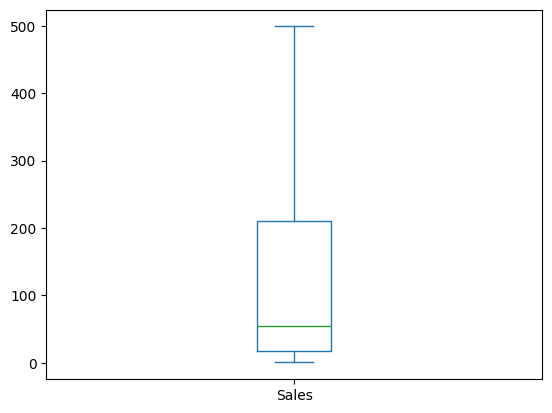

In [19]:
#plot to check the distribution
df['Sales'].plot(kind='box')
plt.show()

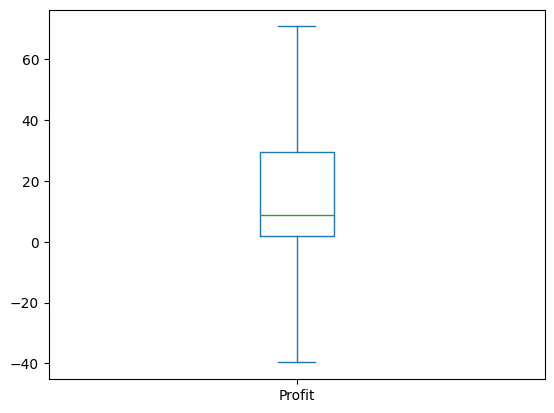

In [20]:
#also check profit
df['Profit'].plot(kind='box')
plt.show()

# **3. Exploratory Data Analysis**

## **a.Univariate Analysis**